<a href="https://colab.research.google.com/github/arieanatalavera/arieanatalavera.github.io/blob/main/arieanatalavera_github_co.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 1- Automation Anxiety: Is Automation Really Replacing Human Employement?

This walk-through is presented/created by Arieana Talavera and Kathryn Sullivan.

#Overview
We will conduct a review of automation anxiety in the economy, by analyzing aspects such as how rising productivity and technological investment influence employment levels and job creation/loss over time.

#Questions

Is there a current rise or fall in automation-related spending? Does this correlate positively or negatively or not at all with employment levels?

Are there any correlated peaks or major drops in all of the series and if there are is it due to an event that occured such as the launch of a new technology or a financial crisis?

How are rising productivity levels and increases in automation-related spending influencing overall employment in the US and do these trends suggest that technological innovation is supporting job growth or contributing to job displacement over time?
 This last question will be our focus for this overview.

Here is our [link](https://arieanatalavera.github.io/)


# Collaboration Plan
We were in frequent communication for meeting dates and times. Discussion on which platform of meet would work best (Zoom, in-person). Ultimately we decided that in-person meetings would be most beneficial for work sessions while text messaging would be best to discuss plans. All files that were being worked on were shared to each other's gmails including the repository and the colab. We had a meeting for what datasets we wanted to work with, title, and questions we could answer with the datasets in mind, a meeting for how to describe those datasets (3 summary statistics to do) coded those in the colab file. Finally, one last meeting to discuss any more edits/concerns for the code.
For the future of our project we will be planning to meet on Monday evenings which works for our schedules the best. Continuing to discuss what has been completed, what needs to be improved, and what needs to be started.


#About our Data
We pulled our data off of FRED, since Kathryn was familiar with pulling data from there from other classes. We then chose 3 datasets listed below and first uploaded the data from FRED to 3 seperate excel sheets. For one series we did have to transform the series from being monthly to quarterly. We then turned this data to have four columns. The first was date, the second was PAYEMS, then OPHNFB and finally PNFI. We chose also to do the data range of 1980 to 2025 because we felt that this was the most pivotal times in technology specifically automation due to the rise of computers in the 90's. Below we have listed each series, a brief description (based off the Read_Me sections from FRED), and how we used it and what we named it which can be seen in our data cleaning and tidying section.

#Series 1: All Employees, Total Nonfarm Payroll (PAYEMS)
- Link: [All Employees, Total Nonfarm (PAYEMS) | FRED | St. Louis Fed](https://fred.stlouisfed.org/series/PAYEMS)
- Description: Measure of the number of U.S. workers in the economy (excludes proprietors, private household employees, unpaid volunteers, farm employees, and the unincorporated self-employed.)
- Frequency: Monthly (will need to transform to quarterly by exporting it to excel and cleaning it)
- Units: Thousands of Persons
- What we will use it for: show if jobs are keeping up with productivity, if it is then innovation is supporting employment, if not than innovation is decreasing employment
- Our name: num_workers

# Series 2: Nonfarm Business Sector: Labor Productivity (Output per Hour) for All Workers (OPHNFB)
- Link: [Nonfarm Business Sector: Labor Productivity (Output per Hour) for All Workers (OPHNFB) | FRED | St. Louis Fed](https://fred.stlouisfed.org/series/OPHNFB)
- Description: the amount of goods and services produced per hour of labor
- Units: Index, base year 2017 = 100
- Frequency: Quarterly
- What we will use it for: this will show the efficiency gained from tech adaption. If there is a rise in productivity without a corresponding rise in the employee series than we can see that the growth is driven by automation not employment
- Our name: productivity

#Series 3: Private Nonresidential Fixed Investment (PNFI)
- Link: [Private Nonresidential Fixed Investment (PNFI) | FRED | St. Louis Fed](https://fred.stlouisfed.org/series/PNFI)
- Description: Business’s investment in physical assets such as buildings, machinery, technology infrastructure, and software
- Units: Billions of $
- Frequency: Quarterly
- What will we use it for: proxy for automation spending. If there is a positive correlation between a rise of productivity and automation spending but no rise in employment can infer that the rise in productivity is due to investing in new tech, not a rise in employment
- Our name: aut_spending (short for automation spending)


In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The first step to working with code is loading in our dataset for the platform we’re using. We can do this by importing the necessary libraries. After loading the libraries needed for this project, we’ll address any formatting issues that appear which is purely for visual aspects and display the resulting data. Each step in the code will be walked-through as it occurs.

# Reading in the dataset

When loading in the libraries we will load pandas as pd and the file type we are reading in is a csv. This simply means when we are reading the data in we will state "_pd.read_csv_".
This function tells Pandas to read a Comma Separated Values (CSV) file type!

In [52]:
#Import PAYEMS from repo
import pandas as pd

#Get raw url from github repo
payems_url = "https://raw.githubusercontent.com/arieanatalavera/arieanatalavera.github.io/refs/heads/main/PAYEMS.csv"

#Load raw file and parse using date
payems = pd.read_csv(payems_url, parse_dates=["observation_date"])
payems = payems.set_index("observation_date").sort_index()

#Check
print("Raw PAYEMS Data:")
print(payems.head())
print(payems.tail())


Raw PAYEMS Data:
                  PAYEMS
observation_date        
1939-01-01         29923
1939-02-01         30100
1939-03-01         30280
1939-04-01         30094
1939-05-01         30299
                  PAYEMS
observation_date        
2025-04-01        159433
2025-05-01        159452
2025-06-01        159439
2025-07-01        159518
2025-08-01        159540


In [53]:
#Import OPHNFB from repo

#Get raw url from github repo
url_ophnfb = "https://raw.githubusercontent.com/arieanatalavera/arieanatalavera.github.io/refs/heads/main/OPHNFB.csv"

#Load raw file and parse using date
ophnfb = pd.read_csv(url_ophnfb, parse_dates=["observation_date"])
ophnfb = ophnfb.set_index("observation_date").sort_index()

#Check
print("Raw OPHNFB Data:")
print(ophnfb.head())
print(ophnfb.tail())

Raw OPHNFB Data:
                  OPHNFB
observation_date        
1947-01-01        22.256
1947-04-01        22.762
1947-07-01        22.065
1947-10-01        22.993
1948-01-01        23.097
                   OPHNFB
observation_date         
2024-04-01        114.430
2024-07-01        115.241
2024-10-01        115.725
2025-01-01        115.206
2025-04-01        116.143


Lets load in the Private Nonresidential Fixed Investment (PNFI) series

In [54]:
#Load PNFI from repo

#Get raw url from github repo
url_pnfi = "https://raw.githubusercontent.com/arieanatalavera/arieanatalavera.github.io/refs/heads/main/PNFI.csv"

#Load raw file and parse using date
pnfi = pd.read_csv(url_pnfi, parse_dates=["observation_date"])
pnfi = pnfi.set_index("observation_date").sort_index()

#Check
print("Raw PNFI Data:")
print(pnfi.head())
print(pnfi.tail())


Raw PNFI Data:
                    PNFI
observation_date        
1947-01-01        24.818
1947-04-01        25.171
1947-07-01        25.361
1947-10-01        26.540
1948-01-01        28.231
                      PNFI
observation_date          
2024-04-01        4012.411
2024-07-01        4069.186
2024-10-01        4046.390
2025-01-01        4137.819
2025-04-01        4207.512


# Cleaning the data
Now that we have all the raw csv files downloaded from fred into our repo and uploaded to our collab, lets clean them so all the datasets uniformally have a date range from 1980 to 2025 and are  quarterly.

In [55]:
#Clean PAYEMS

#Date Range 1980 to 2024
payems_clean = payems.loc["1980-01-01" : "2024-12-31"]

#Convert annual data to quarterly data
series_name = payems_clean.columns[0]
payems_quarterly = payems_clean.resample("Q")[series_name].mean()

payems_quarterly = payems_quarterly.to_frame(name=series_name)
payems_quarterly = payems_quarterly.loc["1980-01-01" : "2024-12-31"]

#Check
print("PAYEMS Quarterly (1980–2025):")
print(payems_quarterly.head())
print(payems_quarterly.tail())

PAYEMS Quarterly (1980–2025):
                        PAYEMS
observation_date              
1980-03-31        90892.333333
1980-06-30        90456.666667
1980-09-30        90050.666667
1980-12-31        90726.666667
1981-03-31        91116.000000
                         PAYEMS
observation_date               
2023-12-31        156703.666667
2024-03-31        157279.000000
2024-06-30        157792.666667
2024-09-30        158130.333333
2024-12-31        158639.666667


/tmp/ipython-input-1715167861.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  payems_quarterly = payems_clean.resample("Q")[series_name].mean()


In [56]:
#Clean OPHNFB

#Ensure date range
ophnfb_clean = ophnfb.loc["1980-01-01" : "2024-12-31"]

#Ensure quarterly
series_name = ophnfb_clean.columns[0]
ophnfb_quarterly = ophnfb_clean.resample("Q")[series_name].mean()

ophnfb_quarterly = ophnfb_quarterly.to_frame(name=series_name)
ophnfb_quarterly = ophnfb_quarterly.loc["1980-01-01" : "2024-12-31"]

#Check
print("OPHNFB Quarterly (1980–2024):")
print(ophnfb_quarterly.head())
print(ophnfb_quarterly.tail())


OPHNFB Quarterly (1980–2024):
                  OPHNFB
observation_date        
1980-03-31        49.639
1980-06-30        49.122
1980-09-30        49.316
1980-12-31        49.817
1981-03-31        50.584
                   OPHNFB
observation_date         
2023-12-31        113.391
2024-03-31        113.845
2024-06-30        114.430
2024-09-30        115.241
2024-12-31        115.725


/tmp/ipython-input-3707002446.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ophnfb_quarterly = ophnfb_clean.resample("Q")[series_name].mean()


In [57]:
#Clean PNFI

#Date range
pnfi_clean = pnfi.loc["1980-01-01" : "2024-12-31"]

#Ensure quarterly
series_name = pnfi_clean.columns[0]
pnfi_quarterly = pnfi_clean.resample("Q")[series_name].mean()

pnfi_quarterly = pnfi_quarterly.to_frame(name=series_name)
pnfi_quarterly = pnfi_quarterly.loc["1980-01-01" : "2024-12-31"]

#Check
print("PNFI Quarterly (1980–2024):")
print(pnfi_quarterly.head())
print(pnfi_quarterly.tail())


PNFI Quarterly (1980–2024):
                     PNFI
observation_date         
1980-03-31        404.492
1980-06-30        394.680
1980-09-30        405.717
1980-12-31        422.755
1981-03-31        443.025
                      PNFI
observation_date          
2023-12-31        3941.343
2024-03-31        3963.752
2024-06-30        4012.411
2024-09-30        4069.186
2024-12-31        4046.390


/tmp/ipython-input-3493099961.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  pnfi_quarterly = pnfi_clean.resample("Q")[series_name].mean()


Before merging, we need to ensure all the lengths of the datasets are the same and make sure the date index is the same.

In [58]:
#Check if all the same length
print(len(payems_quarterly))
print(len(ophnfb_quarterly))
print(len(pnfi_quarterly))

#Check if Date Index
print(payems_quarterly.index.min(), payems_quarterly.index.max())
print(ophnfb_quarterly.index.min(), ophnfb_quarterly.index.max())
print(pnfi_quarterly.index.min(), pnfi_quarterly.index.max())


180
180
180
1980-03-31 00:00:00 2024-12-31 00:00:00
1980-03-31 00:00:00 2024-12-31 00:00:00
1980-03-31 00:00:00 2024-12-31 00:00:00


Merge the Data into one dataset so we can do summary statistics!

In [59]:
#Merge
merged = pd.concat(
    [payems_quarterly, ophnfb_quarterly, pnfi_quarterly],
    axis=1
)

print("Merged dataset:")
print(merged.head())
print(merged.tail())


Merged dataset:
                        PAYEMS  OPHNFB     PNFI
observation_date                               
1980-03-31        90892.333333  49.639  404.492
1980-06-30        90456.666667  49.122  394.680
1980-09-30        90050.666667  49.316  405.717
1980-12-31        90726.666667  49.817  422.755
1981-03-31        91116.000000  50.584  443.025
                         PAYEMS   OPHNFB      PNFI
observation_date                                  
2023-12-31        156703.666667  113.391  3941.343
2024-03-31        157279.000000  113.845  3963.752
2024-06-30        157792.666667  114.430  4012.411
2024-09-30        158130.333333  115.241  4069.186
2024-12-31        158639.666667  115.725  4046.390


#Summary Statistics:
this will be interesting aspects of our data that has the most relative meaning to what we are analyzing!

In [60]:
#1) Correlation Matrix
corr_matrix = merged.corr()

print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
          PAYEMS    OPHNFB      PNFI
PAYEMS  1.000000  0.942282  0.926614
OPHNFB  0.942282  1.000000  0.963803
PNFI    0.926614  0.963803  1.000000


**Correlation:**
The correlations are all extremely high and positive, which makes sense because these macro variables tend to move together over time. Employment (PAYEMS) is very closely tied to both productivity (OPHNFB) and investment (PNFI), and productivity and investment have the strongest relationship of all. Overall, this just shows that as the economy grows, all three series rise together.



In [61]:
#2) Skew
skew_values = merged.skew()
print("Skewness:")
print(skew_values)

Skewness:
PAYEMS   -0.335278
OPHNFB    0.173471
PNFI      0.731355
dtype: float64


**Skew:**
PAYEMS has a slightly negative skew, which means the distribution leans a bit toward lower values. That makes sense because employment tends to fall sharply during recessions. OPHNFB is basically symmetric with only a small positive skew. PNFI has the strongest positive skew, which fits investment data since a few periods of very high investment pull the average upward. Overall, the skew values are pretty mild, but PNFI is the most right-tailed.

In [62]:
#3) Quarterly percent change
pct_change = merged.pct_change() * 100

# Average quarterly percent change for each series
avg_qtr_change = pct_change.mean()

print("Average Quarterly Percent Change:")
print(avg_qtr_change)

Average Quarterly Percent Change:
PAYEMS    0.317895
OPHNFB    0.476811
PNFI      1.316976
dtype: float64


**Quarterly Growth:**
On average, all three variables grow each quarter, but at different speeds. PAYEMS grows the slowest at around 0.32 percent per quarter, which makes sense because employment usually changes gradually. OPHNFB grows a bit faster at about 0.48 percent, showing steady productivity gains over time. PNFI grows the fastest by far at around 1.32 percent per quarter, which reflects how investment tends to be more volatile and responsive to changes in economic conditions. Overall, the percent changes line up with what you would expect from these types of macroeconomic series.

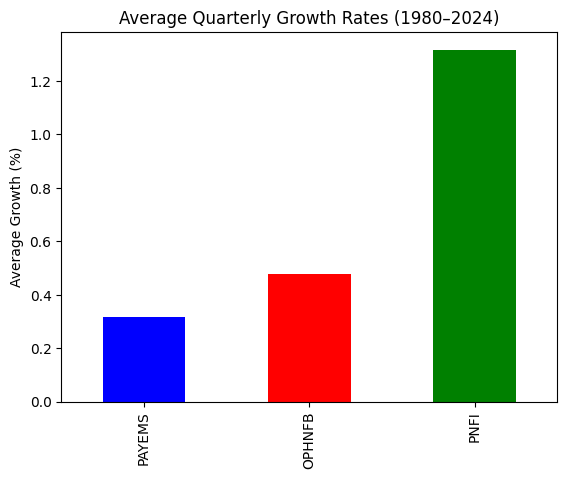

In [63]:
import matplotlib.pyplot as plt

# Use the average percent change series you computed
growth = avg_qtr_change

# Create bar plot
growth.plot(kind="bar", color=["blue", "red", "green"])

# Add title and labels
plt.title("Average Quarterly Growth Rates (1980–2024)")
plt.ylabel("Average Growth (%)")

# Display the plot
plt.show()


**Relevance of Graph:**
This suggests association automation spending is growing much faster than jobs and productivity. This is relevant because it supports the idea of automation anxiety where technology investments are increasing but employment is not keeping up with it.




# Conclusion
From 1980 to 2025, automation spending and productivity have increased much faster than overall employment. This suggests that while technology and automation are helping the economy grow, they’re not necessarily creating jobs at the same pace. The trends might show that efficiency is becoming more tech-driven rather than people-driven. Overall, automation doesn’t seem to be replacing workers outright but is definitely changing what kinds of jobs are needed.
# Future work
Future work could involve testing a regression model as well as more visualizations for these datasets. We could look deeper into how these trends play out across different industries or time periods.

In [64]:
!ls /content/drive/MyDrive



 59B36547-0037-4548-B3FA-3960C19584A6.jpeg
 5D4FFB38-BB59-4C25-8441-558A612FD57F.jpeg
 60178705300__AC5A520D-16A0-44A1-9950-9B339DA70188.JPG
 60979988890__FD26F85D-5A7E-4D76-AA85-B95A704C0971.JPG
'Academic Resume.pdf'
'After college Life Plan.gsheet'
'Anatomy labeling sheet.gdoc'
 arieanatalavera.github.co
 arieanatalavera_github_co.html
 arieanatalavera_github_co.ipynb
"Arieana Talavera's Letter.gdoc"
'Assignment 2: Journal Artical.gdoc'
'Background investigation form 20-8005.gdoc'
'Background investigation form 20-8005.pdf'
'BECOMING A BIOMED ENGINEER.gsheet'
'biomed internships 2026.gdoc'
'BME Balloon cars.gslides'
'BME Ideas & Budget.gsheet'
'BMEN3030 Write-Up.gdoc'
'BME Stickers.gform'
'Brochure (1).gdoc'
 Brochure.gdoc
 C6863060-A5F4-41F4-81E0-60274385D768.jpeg
'CALC Review .gdoc'
 CB74CB4F-0C11-4A47-AAAA-8DD97C7698BF.png
'CELL 1010 TED Talk.gdoc'
'Cell Bio Exam A Answers.gdoc'
 chat-media-video-D366ECD6-2905-4A0F-BC02-2130CCC757F2.mov
 Chiptole.gform
'Clinical Correlate -Heart V

In [65]:

!jupyter nbconvert --to html "/content/drive/MyDrive/arieanatalavera_github_co.ipynb"



[NbConvertApp] Converting notebook /content/drive/MyDrive/arieanatalavera_github_co.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 340402 bytes to /content/drive/MyDrive/arieanatalavera_github_co.html


**Milestone 2**

**Goal for Milestone 2**
* 5 graphs and summary statistics/tables which includes cross-tabulations, groups, measures of central tendency, and/or any of the other EDA techniques discussed showing that we have started to investigated our data and have an understanding of what is in our dataset.

**Graphs**

Graph 1: Time Series Line Plot
- Graph + Description + EDA

Text(0, 0.5, 'Levels')

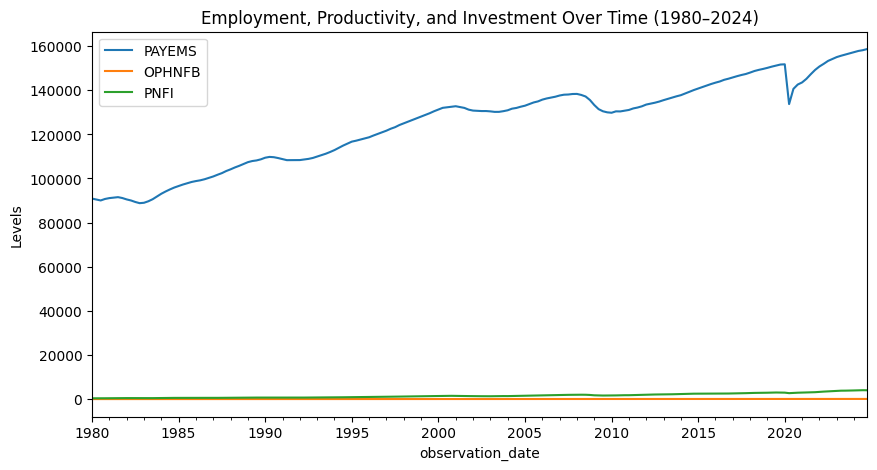

In [66]:
merged.plot(figsize=(10,5))
plt.title("Employment, Productivity, and Investment Over Time (1980–2024)")
plt.ylabel("Levels")

This graph shows the long-run upward trends in all three variables. You can see from the graph that productivity and investment rise faster than employment, which is consistent with how automation and technology scale faster than labor. This gives important context for our key automation question, because we can visually compare how these trends move together over several decades.

Graph 2: Quarterly Percent Change Line Plot
- Graph + EDA on volatility + understanding of structure

Text(0, 0.5, '% Change')

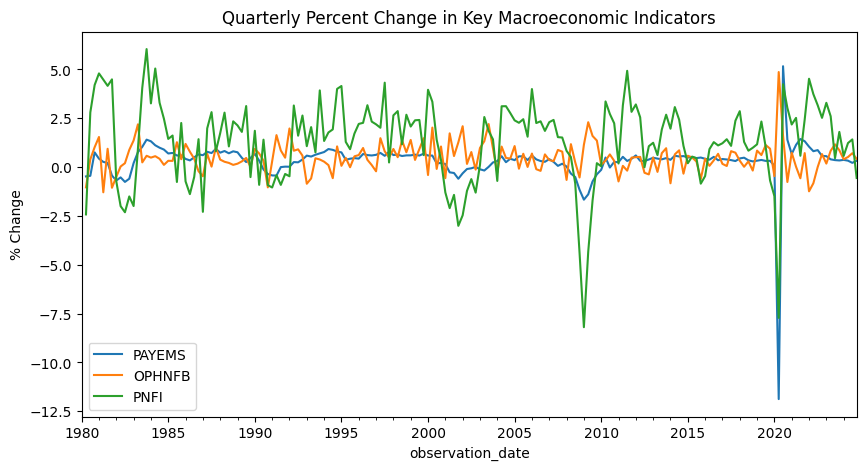

In [67]:
pct_change.plot(figsize=(10,5))
plt.title("Quarterly Percent Change in Key Macroeconomic Indicators")
plt.ylabel("% Change")

Wow, look at that graph! Looks a bit crazy, but it can tell us important things. The percent change chart shows that investment is much more volatile than employment or productivity. This is meaningful because it highlights that automation-related spending reacts quickly to economic shifts, while employment moves more slowly. This helps us think about whether automation shocks immediately show up in job numbers.

Graph 3: Scatterplot:
- Productivity vs Employment
- Graph + explanation of relationships between variables

Text(0.5, 1.0, 'Productivity vs Employment')

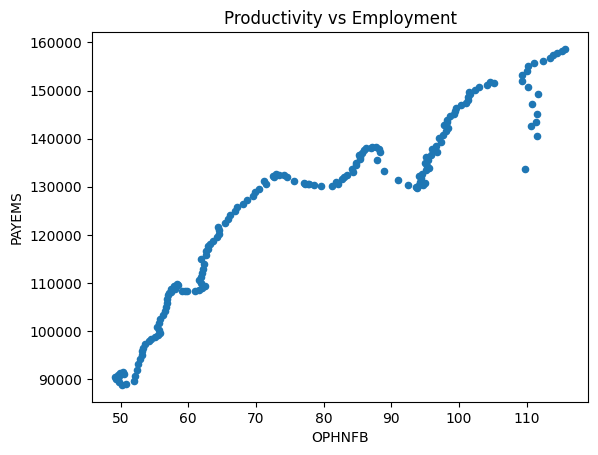

In [68]:
merged.plot.scatter(x="OPHNFB", y="PAYEMS")
plt.title("Productivity vs Employment")

This is a scatterplot and it is showing us a strong positive relationship between productivity and employment. Higher productivity tends to occur when more people are employed, which goes against the narrative that rising productivity automatically replaces workers.

Graph 4: Scatterplot:
- Investment vs Employment
- Graph + interpretation + supports research question

Text(0.5, 1.0, 'Investment vs Employment')

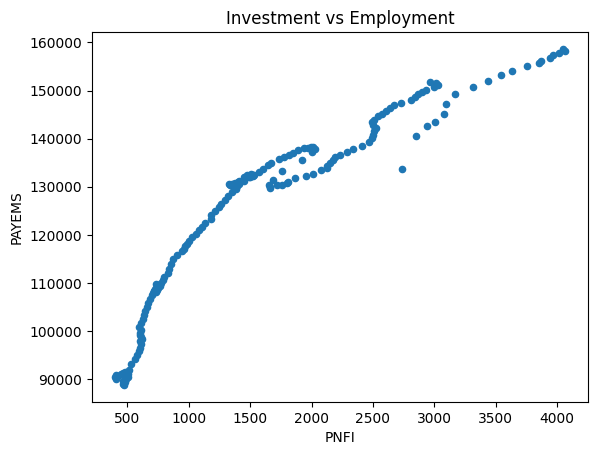

In [69]:
merged.plot.scatter(x="PNFI", y="PAYEMS")
plt.title("Investment vs Employment")

This graph (also a scatter plot) shows that investment and employment also rise together. When companies spend more on equipment, technology, or automation, employment is generally higher—not lower. This supports our focus question on whether automation complements labor rather than replacing it.

Graph 5: Decade-Averaged Bar Chart
- Grouping / cross-tabulation + graph + explanation

Text(0, 0.5, 'Average Level')

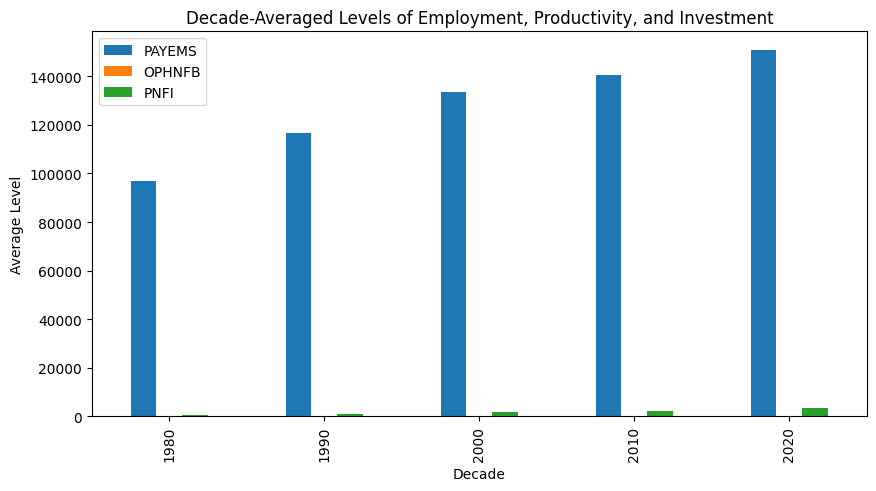

In [70]:
merged['Decade'] = (merged.index.year // 10) * 10
decade_means = merged.groupby('Decade').mean()

decade_means[['PAYEMS','OPHNFB','PNFI']].plot(kind='bar', figsize=(10,5))
plt.title("Decade-Averaged Levels of Employment, Productivity, and Investment")
plt.ylabel("Average Level")

This bar chart compares average employment, productivity, and investment across decades. It shows how each decade has seen increases in productivity and investment, while employment steadily rises. This gives a broader sense of how structural economic changes align with the rise of automation.

**Summary Statistics**

1. Summary Table (describe())
- Measures of central tendency, spread, and distribution

In [71]:
merged.describe()

,PAYEMS,OPHNFB,PNFI,Decade
count,180.000000,180.000000,180.000000,180.000000
mean,125095.718519,78.349533,1616.551761,1997.777778
std,19338.555125,20.363618,969.286229,13.183516
min,88821.333333,49.122000,394.680000,1980.000000
25%,108762.250000,58.920000,733.377250,1990.000000
50%,130561.000000,77.504000,1428.658000,2000.000000
75%,137989.916667,95.867000,2245.704500,2010.000000
max,158639.666667,115.725000,4069.186000,2020.000000


This table provides basic descriptive statistics like mean, standard deviation, and quartiles. It gives a good sense of the scale and variability of each variable, which is essential before building any models.

2. Quantiles Table
- Distribution analysis

In [72]:
merged.quantile([0.25, 0.5, 0.75])

,PAYEMS,OPHNFB,PNFI,Decade
0.25,108762.250000,58.920,733.37725,1990.0
0.50,130561.000000,77.504,1428.65800,2000.0
0.75,137989.916667,95.867,2245.70450,2010.0


This shows where most observations fall and helps identify whether a variable has long tails or clusters. PNFI, for example, has a much wider spread due to investment spikes.

3. Volatility Table (Standard Deviation of Percent Change)
- Additional summary statistic + economic interpretation

In [73]:
pct_change.std()

,0
PAYEMS,1.091709
OPHNFB,0.756806
PNFI,2.103647


This shows which variable fluctuates the most quarter to quarter. Investment is the most volatile by far, which fits the idea that companies change automation-related spending much faster than they change hiring.

**Cross Tabulation & Grouping**

In [74]:
merged.groupby("Decade").mean()


,PAYEMS,OPHNFB,PNFI
Decade,,,
1980,96890.233333,53.339300,562.045150
1990,116759.750000,63.395700,964.596250
2000,133376.166667,82.346200,1619.924775
2010,140423.200000,97.818725,2395.516125
2020,150962.766667,111.345950,3464.801250


This gives the average level of employment, productivity, and investment for each decade. It helps reveal structural changes and whether certain periods show faster automation or slower job growth.

**Model Ideas**

Model 1: Regression Model

We plan to run a regression testing whether quarterly changes in productivity and investment help predict changes in employment. This will help quantify whether automation complements or replaces labor.

Model 2: Forecasting Model

We also plan to explore whether productivity or investment can predict future employment using a time-series forecasting model. If automation were reducing jobs, we might expect rising productivity to predict lower employment, not higher.

**Upload notebook**

In [75]:
!jupyter nbconvert --to html "/content/drive/MyDrive/arieanatalavera_github_co.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/arieanatalavera_github_co.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 340402 bytes to /content/drive/MyDrive/arieanatalavera_github_co.html
